<a href="https://colab.research.google.com/github/yenlung/Python-Book/blob/master/%E5%86%92%E9%9A%AA39_%E7%8E%A9%E7%8E%A9%E7%9C%9F%E7%9A%84%E8%82%A1%E7%A5%A8%E8%B3%87%E6%96%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

我們現在要對股價資料做一些處理，方便我們未來做數據處理，使用 `yfinance` 套件來抓資料。

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

引進這個跟財務有關的套件。

In [4]:
import yfinance as yf

讀入台積電的股價，比如我們想看 2021-2022 這兩年的股價。

In [7]:
df = yf.download("2330.TW", start="2021-01-01", end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


有最高最低點、開盤收盤價、調整收盤價以及成交量的資訊。

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,530.0,540.0,528.0,536.0,515.392578,38770328
2021-01-05,536.0,542.0,535.0,542.0,521.161987,34411866
2021-01-06,555.0,555.0,541.0,549.0,527.892761,53030554
2021-01-07,554.0,570.0,553.0,565.0,543.277710,51166782
2021-01-08,580.0,580.0,571.0,580.0,557.700989,59563555


只取調整收盤價。

In [9]:
P = df["Adj Close"]

In [10]:
P.head()

Date
2021-01-04    515.392578
2021-01-05    521.161987
2021-01-06    527.892761
2021-01-07    543.277710
2021-01-08    557.700989
Name: Adj Close, dtype: float64

看一下台積電股價的波動。

<AxesSubplot:xlabel='Date'>

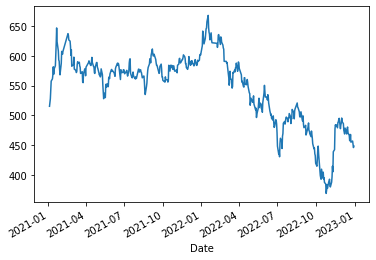

In [11]:
P.plot()

我們看一下大家最關心的報酬率，報酬率公式：$\frac{P_{t}-P_{t-1}}{P_{t-1}}$

In [12]:
r = P.diff()/P

畫出來看看。

<AxesSubplot:xlabel='Date'>

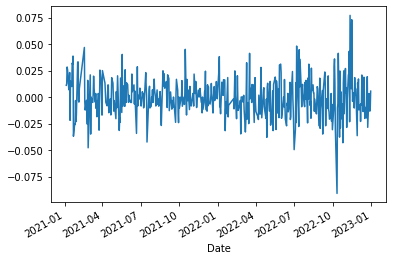

In [13]:
r.plot()

最後一百筆資料。

<AxesSubplot:xlabel='Date'>

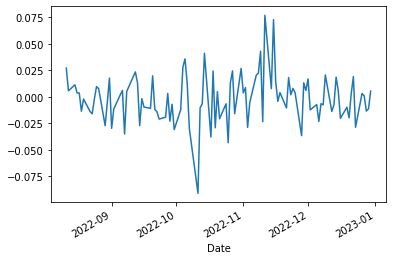

In [14]:
r[-100:].plot()

原本股價圖波動的很厲害，現在我們想讓它變得平滑一點，改看每 20 天的平均。

In [15]:
P.rolling(window=20).mean()

Date
2021-01-04           NaN
2021-01-05           NaN
2021-01-06           NaN
2021-01-07           NaN
2021-01-08           NaN
                 ...    
2022-12-26    473.543138
2022-12-27    472.182498
2022-12-28    470.372716
2022-12-29    467.890366
2022-12-30    465.831299
Name: Adj Close, Length: 489, dtype: float64

可以看到前面幾天沒有值，因為沒辦法往回取得前 19 天的股價。

畫圖發現真的平滑很多。

<AxesSubplot:xlabel='Date'>

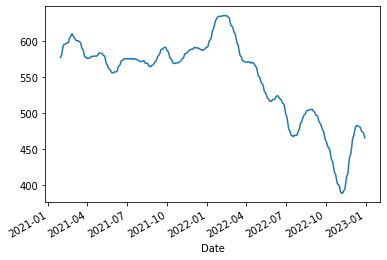

In [16]:
P.rolling(window=20).mean().plot()

和原本的股價圖比較。

<AxesSubplot:xlabel='Date'>

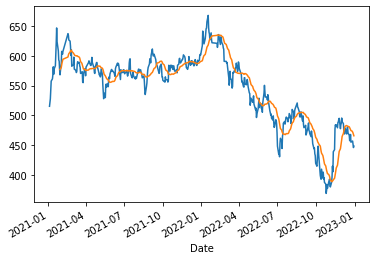

In [17]:
P.plot()
P.rolling(window=20).mean().plot()

當然也可以算更多天的平均，會變得更平滑。

<AxesSubplot:xlabel='Date'>

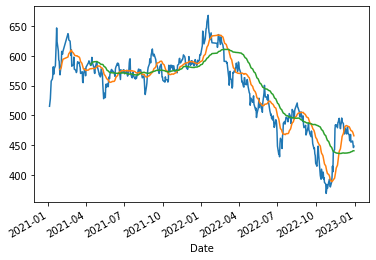

In [18]:
P.plot()
P.rolling(window=20).mean().plot()
P.rolling(window=60).mean().plot()